# Average Hamiltonian theory

The Hamiltonian of a exchange/dipolar/hyperfine coupled system in a doubly rotating frame can be written as

$$H(t) = \omega_A S_z^1 S_z^2 + \omega_B \left(S_+^1 S_-^2 \exp(-i \omega_C t) + S_-^1 S_+^2 \exp(i \omega_C t)\right)$$

The $\omega_A$ and $\omega_B$ depend on the type of coupling, but they describe the secular and pseudosecular contributions. The $\omega_C = \omega_1 - \omega_2$ is the resonance frequency offset that was eliminated by going to the rotating frame.

We employ the average Hamiltonian theory to retrieve the average Hamiltonian with corrections over the time $t_c = \frac{2 \pi}{\omega_C}$. The zeroth order Hamiltonian is $\omega_A S_z^1 S_z^2$ and the first order terms vanish. The second order terms are given by Eq. 26 in [1]

$$H^2 = \frac{-1}{6 t_c} \int_0^{t_c} \int_0^{t_3} \int_0^{t_2} [H(t_3), [H(t_2), H(t_1)]] +[H(t_1), [H(t_2), H(t_3)]] dt_1 dt_2 dt_3$$ 

[1] U. Haeberlen and J. S. Waugh. “Coherent Averaging Effects in Magnetic Resonance”. In: Phys. Rev. 175 (2 Nov. 1968), pp. 453–467. url: https://link.aps.org/doi/10.1103/PhysRev.175.453.

We'll use symbolic python to get the integral

In [7]:
from sympy import *
from sympy.physics.quantum import TensorProduct
init_printing()

t, t_c, t_1, t_2, t_3 = symbols('t t_c t_1 t_2 t_3', real=True)
omega_A, omega_B, omega_C = symbols('omega_A omega_B omega_C', real=True,nonzero=True) 
#the integrals get branches if omegas are allowed to be zero or imaginary, but sympy allows you to specify they cannot be zero

In [2]:
#Define Pauli matrices

sigma_x = Matrix([
    [0,1],
    [1,0]
])

sigma_y = Matrix([
    [0,-I],
    [I,0]
])

sigma_z = Matrix([
    [1,0],
    [0,-1]
])

sigma_3 = eye(2)

In [4]:
#we will need SzSz, S-S+ and S+S-

SzSz = Rational(1,4)*TensorProduct(sigma_z,sigma_z)
SpSm = Rational(1,4)*TensorProduct((sigma_x+I*sigma_y),(sigma_x-I*sigma_y))
SmSp = Rational(1,4)*TensorProduct((sigma_x-I*sigma_y),(sigma_x+I*sigma_y))

In [8]:
Ham_t = omega_A*SzSz + omega_B*(SpSm*exp(-I*omega_C*t)+ SmSp*exp(I*omega_C*t))

In [9]:
H_1 = Ham_t.subs(t,t_1)
H_2 = Ham_t.subs(t,t_2)
H_3 = Ham_t.subs(t,t_3)

Ham_triple_comm = simplify(2*H_3*H_2*H_1 + 2*H_1*H_2*H_3 - H_3*H_1*H_2 - H_2*H_1*H_3 - H_1*H_3*H_2- H_2*H_3*H_1)

integral_1 = simplify(integrate(Ham_triple_comm, (t_1,0,t_2)))
integral_2 = simplify(integrate(integral_1,(t_2,0,t_3)))
integral_3= -simplify(-integrate(integral_2,(t_3,0,t_c))/(6*t_c))

full_average = simplify(integral_3.subs(t_c,(2*pi/omega_C)))

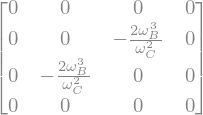

In [16]:
full_average

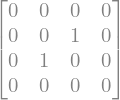

In [17]:
SpSm+SmSp

It averages out to $-2 \frac{\omega_B^3}{\omega_C^2} (S_+ S_- + S_+ S_-)$

If you want to get it automatically: 

In [10]:
sx1, sy1, sz1, sx2, sy2, sz2 = symbols(' S_x^1 S_y^1 S_z^1 S_x^2 S_y^2 S_z^2')
SS = Matrix([2*sx1*sx2, 2*sx1*sy2, 2*sx1*sz2, sx1, 2*sy1*sx2, 2*sy1*sy2, 2*sy1*sz2, sy1, 2*sz1*sx2, 2*sz1*sy2, 2*sz1*sz2, sz1, sx2,sy2,sz2,1])

In [13]:
def hilbert_to_prod_op(rho):
    """
    Takes a 4x4 density matrix and produces a 16 entry density vector in product operator basis
    """
    
    new_rho = Matrix(zeros(16,1))

    new_rho[0] = simplify(trace(rho*TensorProduct(sigma_x,sigma_x)))
    new_rho[1] = simplify(trace(rho*TensorProduct(sigma_x,sigma_y)))
    new_rho[2] = simplify(trace(rho*TensorProduct(sigma_x,sigma_z)))
    new_rho[3] = simplify(trace(rho*TensorProduct(sigma_x,sigma_3)))
    new_rho[4] = simplify(trace(rho*TensorProduct(sigma_y,sigma_x)))
    new_rho[5] = simplify(trace(rho*TensorProduct(sigma_y,sigma_y)))
    new_rho[6] = simplify(trace(rho*TensorProduct(sigma_y,sigma_z)))
    new_rho[7] = simplify(trace(rho*TensorProduct(sigma_y,sigma_3)))
    new_rho[8] = simplify(trace(rho*TensorProduct(sigma_z,sigma_x)))
    new_rho[9] = simplify(trace(rho*TensorProduct(sigma_z,sigma_y)))
    new_rho[10] = simplify(trace(rho*TensorProduct(sigma_z,sigma_z)))
    new_rho[11] = simplify(trace(rho*TensorProduct(sigma_z,sigma_3)))
    new_rho[12] = simplify(trace(rho*TensorProduct(sigma_3,sigma_x)))
    new_rho[13] = simplify(trace(rho*TensorProduct(sigma_3,sigma_y)))
    new_rho[14] = simplify(trace(rho*TensorProduct(sigma_3,sigma_z)))
    new_rho[15] = simplify(trace(rho*TensorProduct(sigma_3,sigma_3)))
    
    return(Rational(1,2)*new_rho)

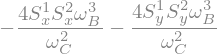

In [15]:
(hilbert_to_prod_op(full_average).T*SS)[0]